# Preparação dos Dados 

Para desenvolvimento do trabalho, serao utilizadas as bibliotecas Numpy, Pandas, Graphviz, Matplotlib, Seaborn e SciKit Learn.


In [58]:
import numpy as np
import pandas as pd
import graphviz
import seaborn as sb
import itertools
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

Importando o *dataset* de *churn* disponibilizado pela IBM

In [40]:
df_raw = pd.read_csv("telco_churn.csv")

Aqui estou executando o tratamento das *features* da base para análise exploratória pelo Seaborn:

In [41]:
lbl = preprocessing.LabelEncoder()

for column_name in df_raw.columns:
    if df_raw[column_name].dtype == object and column_name != "Churn":
        df_raw[column_name] = lbl.fit_transform(df_raw[column_name])
    else:
        pass

# Implementação dos Modelos
Nesta etapa serão executados os modelos de Árvore de Decisão e Regresssão Logísitica.

## Seleção das Features
Após a análise exploratória, serão selecionadas os atributos (features) de interesse para aplicação nos modelos.

In [42]:
df_features = df_raw[['PhoneService','InternetService','MonthlyCharges','tenure','TotalCharges','PaymentMethod']]
df_targets = df_raw['Churn']

Realizando o split do dataset em treino e validação.

In [43]:
x_train, x_test, y_train, y_test = train_test_split(df_features, df_targets, test_size = 0.5)

## Modelo de Árvore de Decisão

Criando um classificador e rodando a árvores de decisão para todas as *features* do *dataset* tendo o Churn como target da classificação


In [44]:
tree_clf = tree.DecisionTreeClassifier(random_state=111, criterion='gini',max_depth=3,min_samples_leaf=3)

Executando o treinamento do modelo:

In [45]:
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=111,
            splitter='best')

Verificando a assertividade do modelo:

In [68]:
cm_decision_tree = confusion_matrix(y_test,tree_clf.predict(x_test))

Realizando a impressão da árvore de decisão gerada:

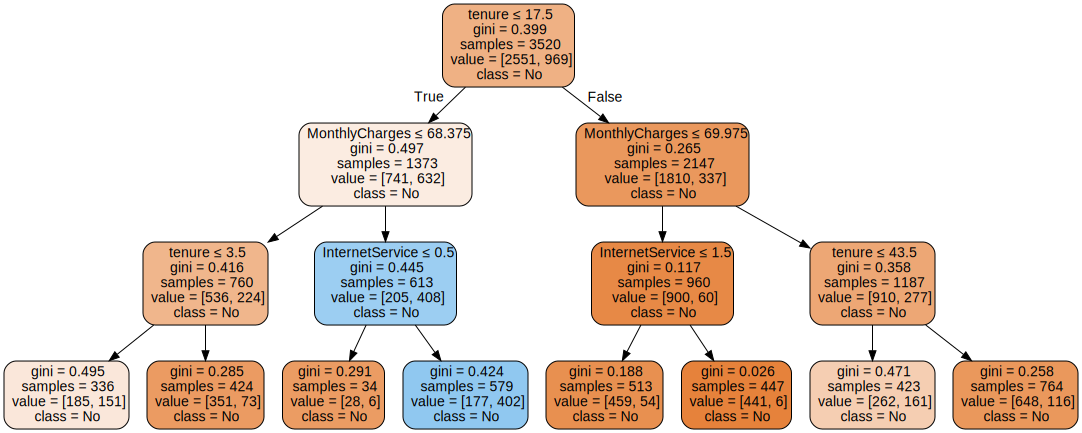

In [48]:
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                         feature_names=df_features.columns,
                         class_names=df_targets,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

## Modelo de Regressão Logística

In [49]:
log_regression = LogisticRegression(solver='lbfgs', random_state=5, multi_class='multinomial', max_iter=500)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=5, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Realizando o treinamento do modelo

In [72]:
log_regression.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=5, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
cm_reg_log = confusion_matrix(y_test,log_regression.predict(x_test))

## Modelo K-Nearest Neighbors

# Predição
Nesta etapa serão executados os modelos previamente treinados, com a finalidade de realizar a predição de um um novo caso

Criando um novo caso para a predição:

In [51]:
new_case = np.array([[1,1,99.9,5,500,1]])
new_case.shape

(1, 6)

Executando a predição com o modelo de árvore de decisão:

In [52]:
tree_prediciton = tree_clf.predict(new_case)
tree_prediciton

array(['Yes'], dtype=object)

Executando a predição com o modelo de regressão logística:

In [53]:
reglog_prediction = log_regression.predict(new_case)
reglog_prediction

array(['Yes'], dtype=object)

## Comparação do Desempenho
Para comparação do desempenho será utilizada uma matrix de confusão com o *layout* customizado, disponível na documentação do Matplotlib, por meio desta [URL](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[2356  265]
 [ 472  427]]


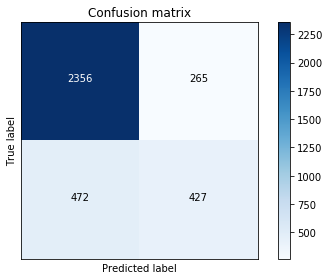

In [71]:
plot_confusion_matrix(cm_reg_log,classes='',normalize=False,)

Confusion matrix, without normalization
[[2431  190]
 [ 542  357]]


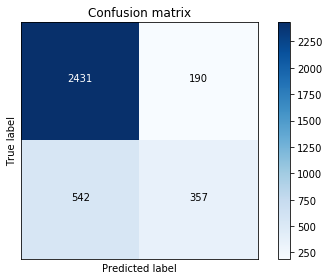

In [70]:
plot_confusion_matrix(cm_decision_tree, classes='', normalize=False)

# Conclusão

# Melhorias